## Preprocesado de datos

Ánalisis de datos y preprocesamiento

#### EDA

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [12]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')
df.head()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

Podemos observar que existen variables tanto numéricas como categóricas. Además, hay algunas variables como EstadoCivil o Experiencia que contienen muchos valores nulos. 

Eliminaremos la primera columna relativa al id. Además, para el problema de regresión eliminaremos también la penúltima columna relativa al creditoaprobado, que es una variable que también se buscará predecir con otro modelo de clasificación.

In [14]:
df = df.drop(['Id'], axis=1)
df = df.drop(['CreditoAprobado'], axis=1)
df.head()

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,0.0,...,45082,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,50.0
1,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,3.0,...,62161,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,54.0
2,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,NaN,...,19911,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,42.4
3,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,1.0,...,42385,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,45.6
4,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,1.0,...,7201,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,61.0


Vemos como se distribuye la variable objetivo

count    50000.000000
mean        50.742756
std          7.918796
min         26.400000
25%         44.800000
50%         52.000000
75%         56.000000
max         81.000000
Name: ScoreRiesgo, dtype: float64


<Figure size 900x800 with 0 Axes>

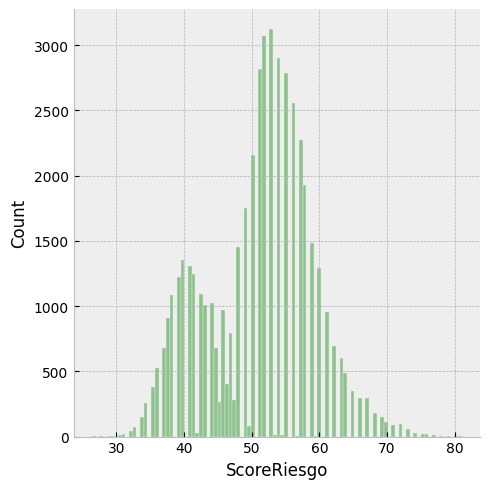

In [15]:
print(df['ScoreRiesgo'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['ScoreRiesgo'], kind='hist', color='g', bins=100, alpha=0.4);

Ahora estudiaremos la distribución de todas las variables. Primero veamos que tipos de variables tenemos.

In [16]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [17]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,44,22119,613.0,20.0,16154,60,0.0,488,0.390112,2,...,45082,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,50.0
1,26,28874,582.0,0.0,11800,24,3.0,718,0.388221,1,...,62161,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,54.0
2,38,84154,507.0,17.0,9257,36,NaN,170,0.358136,2,...,19911,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,42.4
3,51,29464,504.0,25.0,5495,36,1.0,402,0.282602,5,...,42385,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,45.6
4,39,20646,542.0,16.0,14824,60,1.0,242,0.156740,6,...,7201,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,61.0


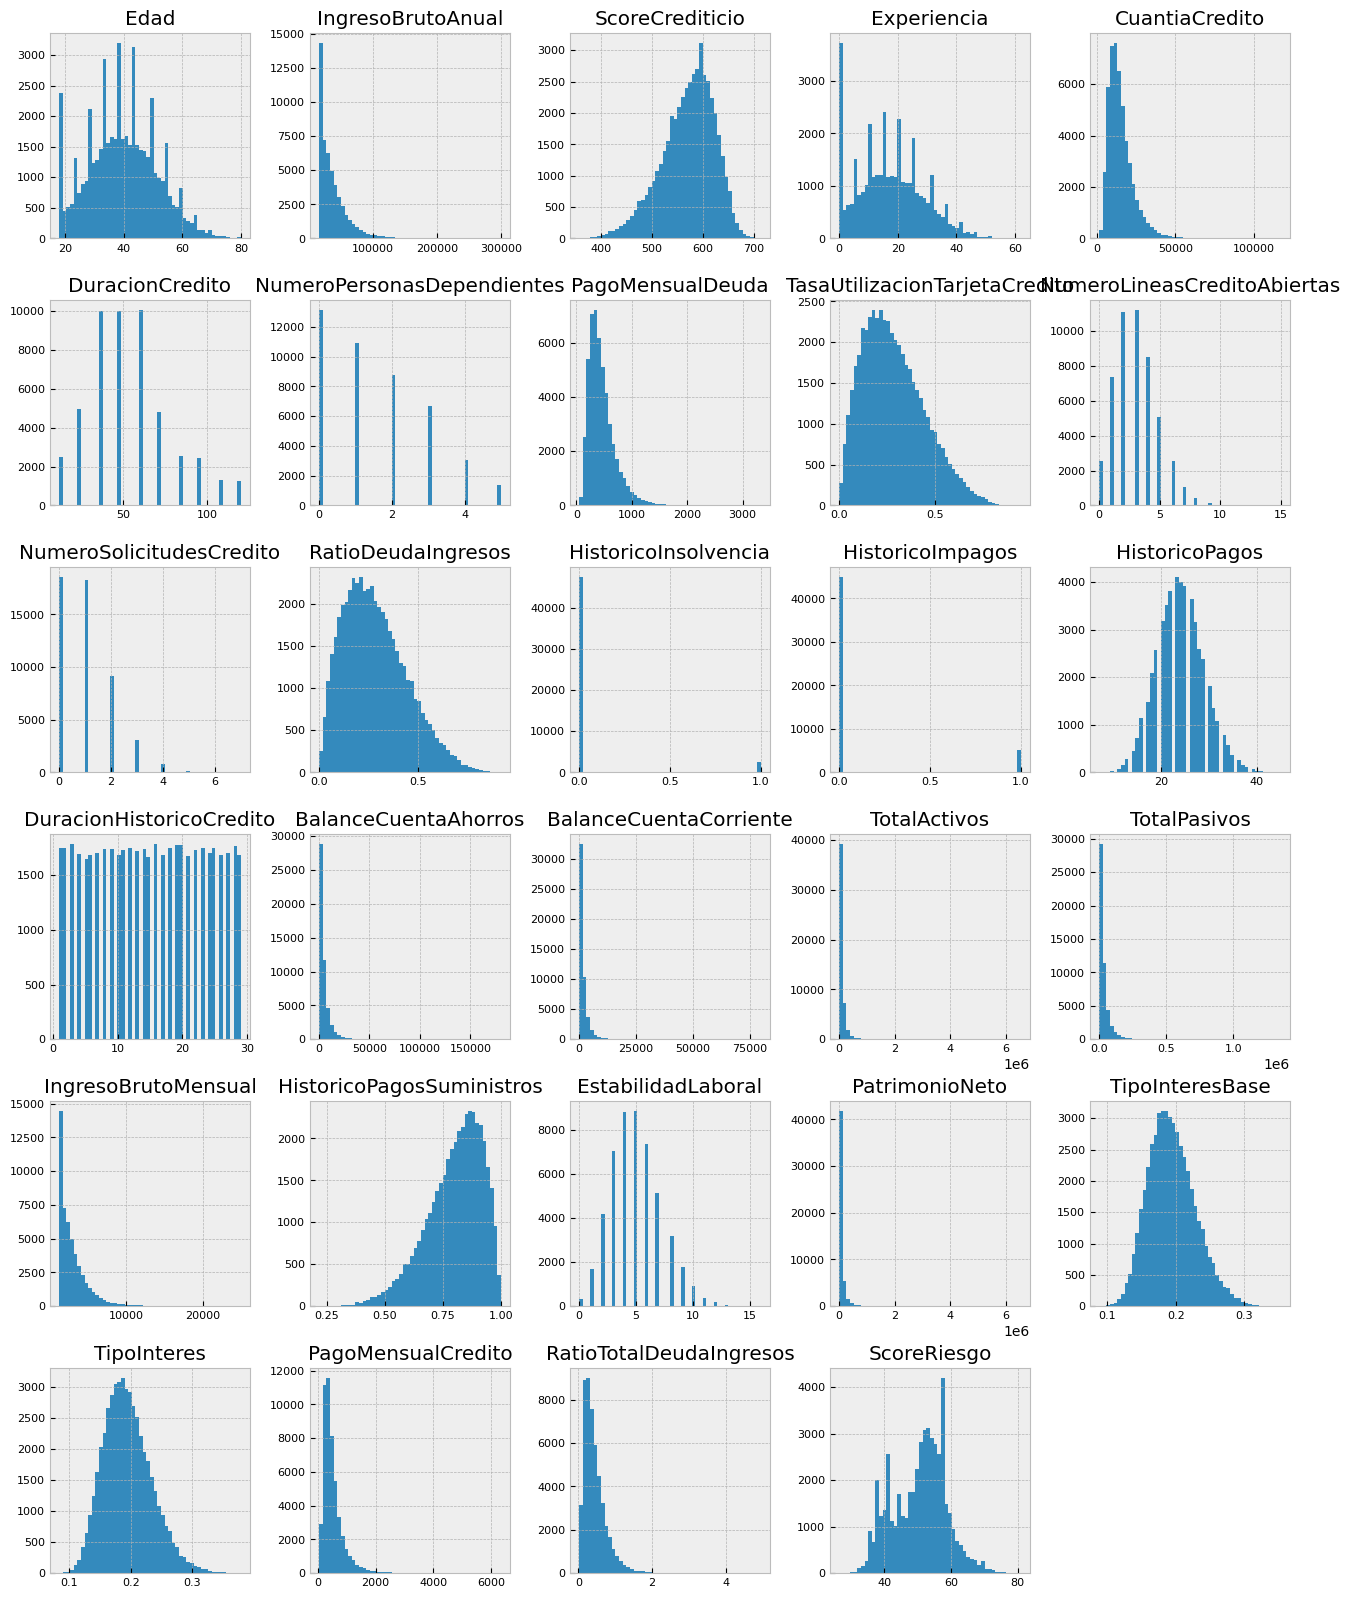

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Ahora buscaremos aquellas variables que están fuertemente relacionadas con la variable dependiente.

Hay 0 variables altamente correlacionadas con ScoreRiesgo


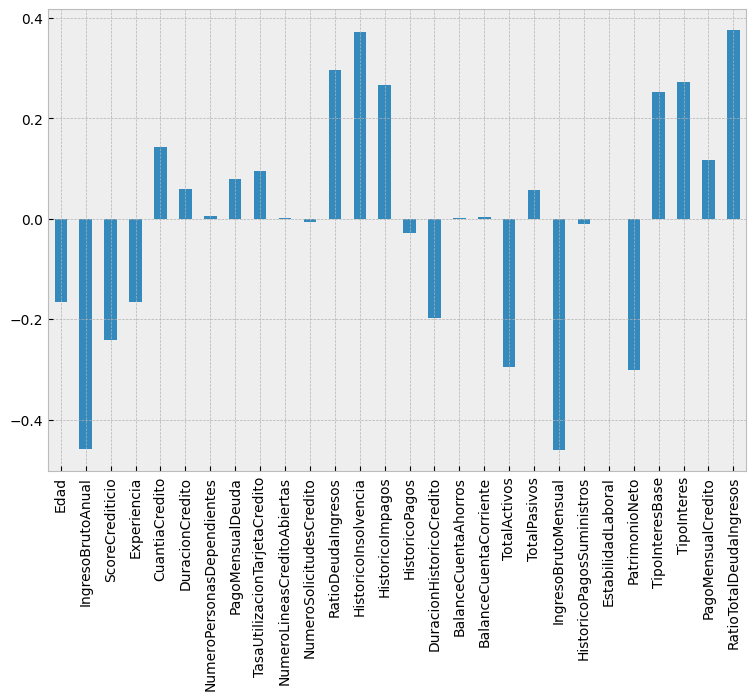

In [23]:
df_num_corr = df_num.corr()['ScoreRiesgo'][:-1]
df_num_corr.plot(kind='bar', figsize=(9, 6))
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Hay {} variables altamente correlacionadas con ScoreRiesgo".format(len(golden_features_list), golden_features_list))

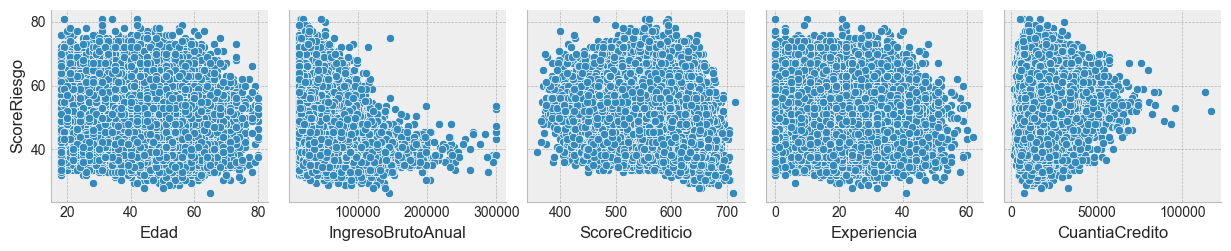

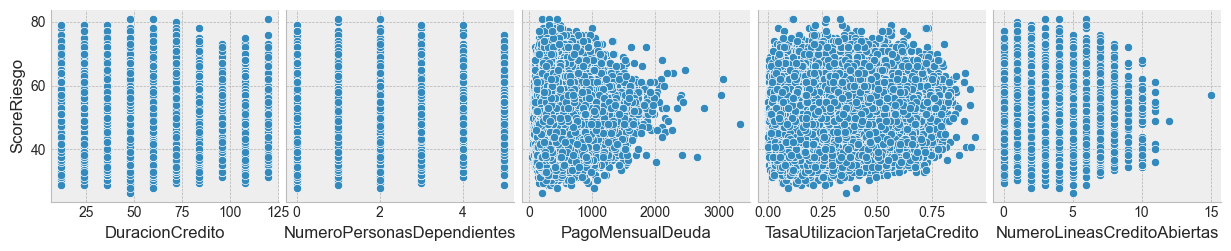

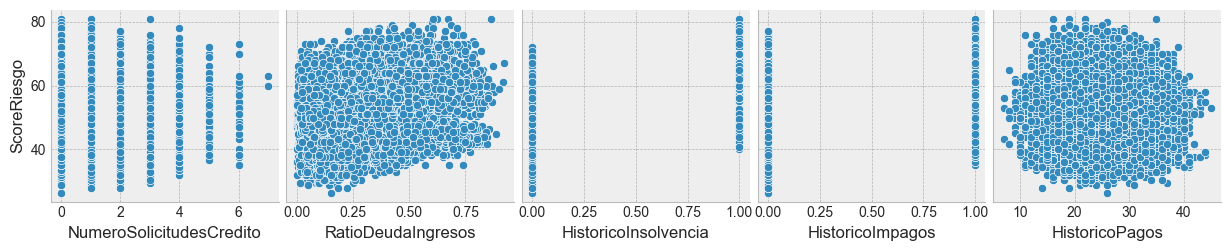

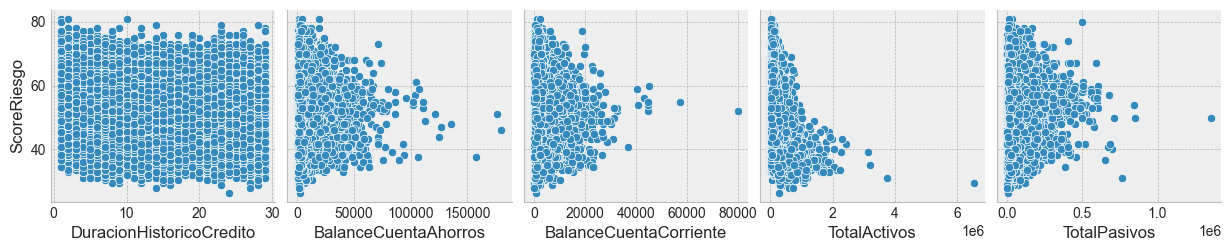

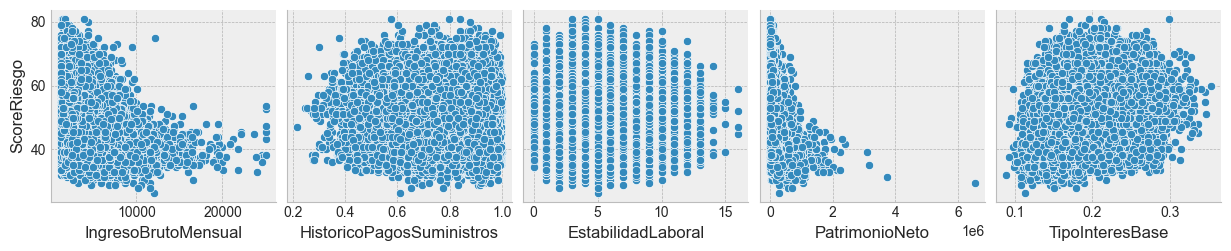

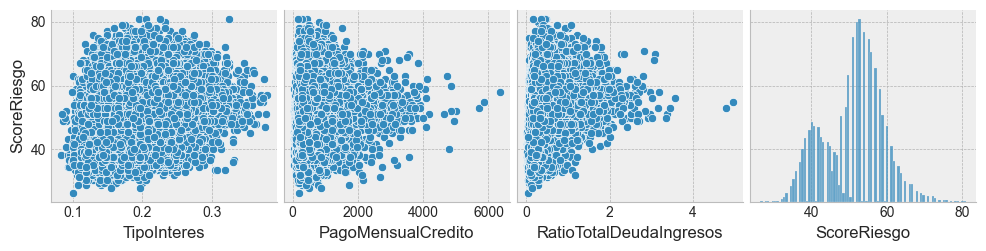

In [19]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, x_vars=df_num.columns[i:i+5], y_vars=['ScoreRiesgo'])

Librerías a utilizar para realizar el EDA.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

%matplotlib inline
sns.set_theme(color_codes=True)

Leemos el archivo del csv.

In [25]:
df = pd.read_csv('../data/EstudioCrediticio_TrainP.csv')
df.head(5)

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


In [26]:
df.tail(5) #Imprime las ultimas 5 filas

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
49995,49996,40,29951,600.0,Empleado/a por cuenta ajena,FP,18.0,5945,24,Divorciado/a,...,2495.916667,NaN,5,43626,0.145945,0.142934,286.261413,0.216859,1,38.4
49996,49997,31,31974,466.0,Empleado/a por cuenta ajena,Doctorado,NaN,13572,72,Casado/a,...,2664.500000,0.797176,6,10350,0.260572,0.245778,362.082922,0.318290,0,50.0
49997,49998,55,68679,611.0,Empleado/a por cuenta ajena,Bachillerato,31.0,16481,60,Casado/a,...,5723.250000,0.957306,7,31159,0.180981,0.182967,421.174132,0.186638,0,63.0
49998,49999,36,23501,599.0,Empleado/a por cuenta ajena,Bachillerato,11.0,29518,12,Casado/a,...,1250.000000,0.813055,2,61452,0.160018,0.148244,2661.800236,2.647840,0,61.0
49999,50000,24,31136,580.0,Empleado/a por cuenta ajena,FP,2.0,8380,36,NaN,...,2594.666667,NaN,7,11516,0.168380,0.167265,297.630591,0.477376,0,56.0


Ahora comprobaremos el tipo de datos que tiene cada una de las columnas.

In [27]:
df.dtypes

Id                                 int64
Edad                               int64
IngresoBrutoAnual                  int64
ScoreCrediticio                  float64
SituacionLaboral                  object
NivelEducativo                    object
Experiencia                      float64
CuantiaCredito                     int64
DuracionCredito                    int64
EstadoCivil                       object
NumeroPersonasDependientes       float64
EstadoVivienda                    object
PagoMensualDeuda                   int64
TasaUtilizacionTarjetaCredito    float64
NumeroLineasCreditoAbiertas        int64
NumeroSolicitudesCredito           int64
RatioDeudaIngresos               float64
HistoricoInsolvencia               int64
ObjetoCredito                     object
HistoricoImpagos                   int64
HistoricoPagos                     int64
DuracionHistoricoCredito           int64
BalanceCuentaAhorros               int64
BalanceCuentaCorriente             int64
TotalActivos    

Eliminamos las columnas irrelevantes. En este caso son la de Id y la de CreditoAprobado.

In [28]:
df = df.drop(['Id', 'CreditoAprobado'], axis = 1)
df.head(5)

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,0.0,...,45082,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,50.0
1,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,3.0,...,62161,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,54.0
2,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,NaN,...,19911,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,42.4
3,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,1.0,...,42385,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,45.6
4,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,1.0,...,7201,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,61.0


Eliminamos duplicados. En este caso no tenemos ninguno.

In [29]:
df.shape

(50000, 34)

In [30]:
duplicated_rows_df = df[df.duplicated()]
print("Número de filas duplicadas: ", duplicated_rows_df.shape)

Número de filas duplicadas:  (0, 34)


El siguiente paso sería eliminar o rellenar los valores nulos. Vemos que hay columnas con numerosos valores nulos. Resaltan Experiencia y EstadoCivil, seguramente porque sean datos de carácter personal a los que el banco no tenga acceso tan fácil.

In [31]:
null_columns = df.columns[df.isnull().any()]
print(df.isnull().sum()[null_columns])

ScoreCrediticio                2500
NivelEducativo                 5000
Experiencia                   13000
EstadoCivil                   11000
NumeroPersonasDependientes     6000
HistoricoPagosSuministros      8500
dtype: int64


En nuestro caso, rellenaremos los datos con algún imputer de skrlearn. Se indicará más adelante al construir los pipes.

Observando las distribuciones, vemos que muchas columnas como 'IngresoBrutoAnual' o 'BalanceCuentaCorriente' presentan outliers. Se estandarizarán todas las variables numéricas usando RobustScaler, que usa la mediana y el intercuartil para dar mejores resultados con la presencia de outliers, pues evita que estos afecten a la estandarización al no usar la media y la varianza.

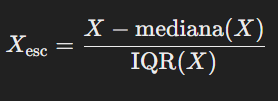

In [39]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_scaled.head()


,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,TotalPasivos,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,ScoreRiesgo
0,0.2500,-0.282807,0.500000,0.1875,0.296760,0.5,-0.333333,0.308244,0.559552,-0.5,...,0.714044,-0.278825,-0.296597,-1.000000,-0.054182,-0.259985,-0.370375,-0.034777,0.348150,-0.178571
1,-0.8750,-0.019672,0.057143,-1.0625,-0.177055,-1.0,0.666667,1.132616,0.551242,-1.0,...,1.243314,-0.013773,NaN,0.333333,1.009376,-0.667293,-0.348227,0.491071,0.513563,0.178571
2,-0.1250,2.133710,-1.014286,0.0000,-0.453791,-0.5,NaN,-0.831541,0.419054,-0.5,...,-0.065992,2.155304,0.370596,-0.333333,0.103752,0.303926,0.502864,-0.181188,-0.813854,-0.857143
3,0.6875,0.003311,-1.057143,0.5000,-0.863183,-0.5,0.000000,0.000000,0.087167,1.0,...,0.630466,0.009378,-0.140400,0.000000,-0.378720,0.255059,0.129152,-0.610300,-0.324532,-0.571429
4,-0.0625,-0.340186,-0.514286,-0.0625,0.152025,0.5,0.000000,-0.573477,-0.465854,1.5,...,-0.459869,-0.336623,-0.642524,-0.666667,-0.279579,0.478200,0.422351,-0.032926,0.040850,0.803571


array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'IngresoBrutoAnual'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'CuantiaCredito'}>],
       [<Axes: title={'center': 'DuracionCredito'}>,
        <Axes: title={'center': 'NumeroPersonasDependientes'}>,
        <Axes: title={'center': 'PagoMensualDeuda'}>,
        <Axes: title={'center': 'TasaUtilizacionTarjetaCredito'}>,
        <Axes: title={'center': 'NumeroLineasCreditoAbiertas'}>],
       [<Axes: title={'center': 'NumeroSolicitudesCredito'}>,
        <Axes: title={'center': 'RatioDeudaIngresos'}>,
        <Axes: title={'center': 'HistoricoInsolvencia'}>,
        <Axes: title={'center': 'HistoricoImpagos'}>,
        <Axes: title={'center': 'HistoricoPagos'}>],
       [<Axes: title={'center': 'DuracionHistoricoCredito'}>,
        <Axes: title={'center': 'BalanceCuentaAhorros'}>,
        <Axes: title={'center': 'BalanceC

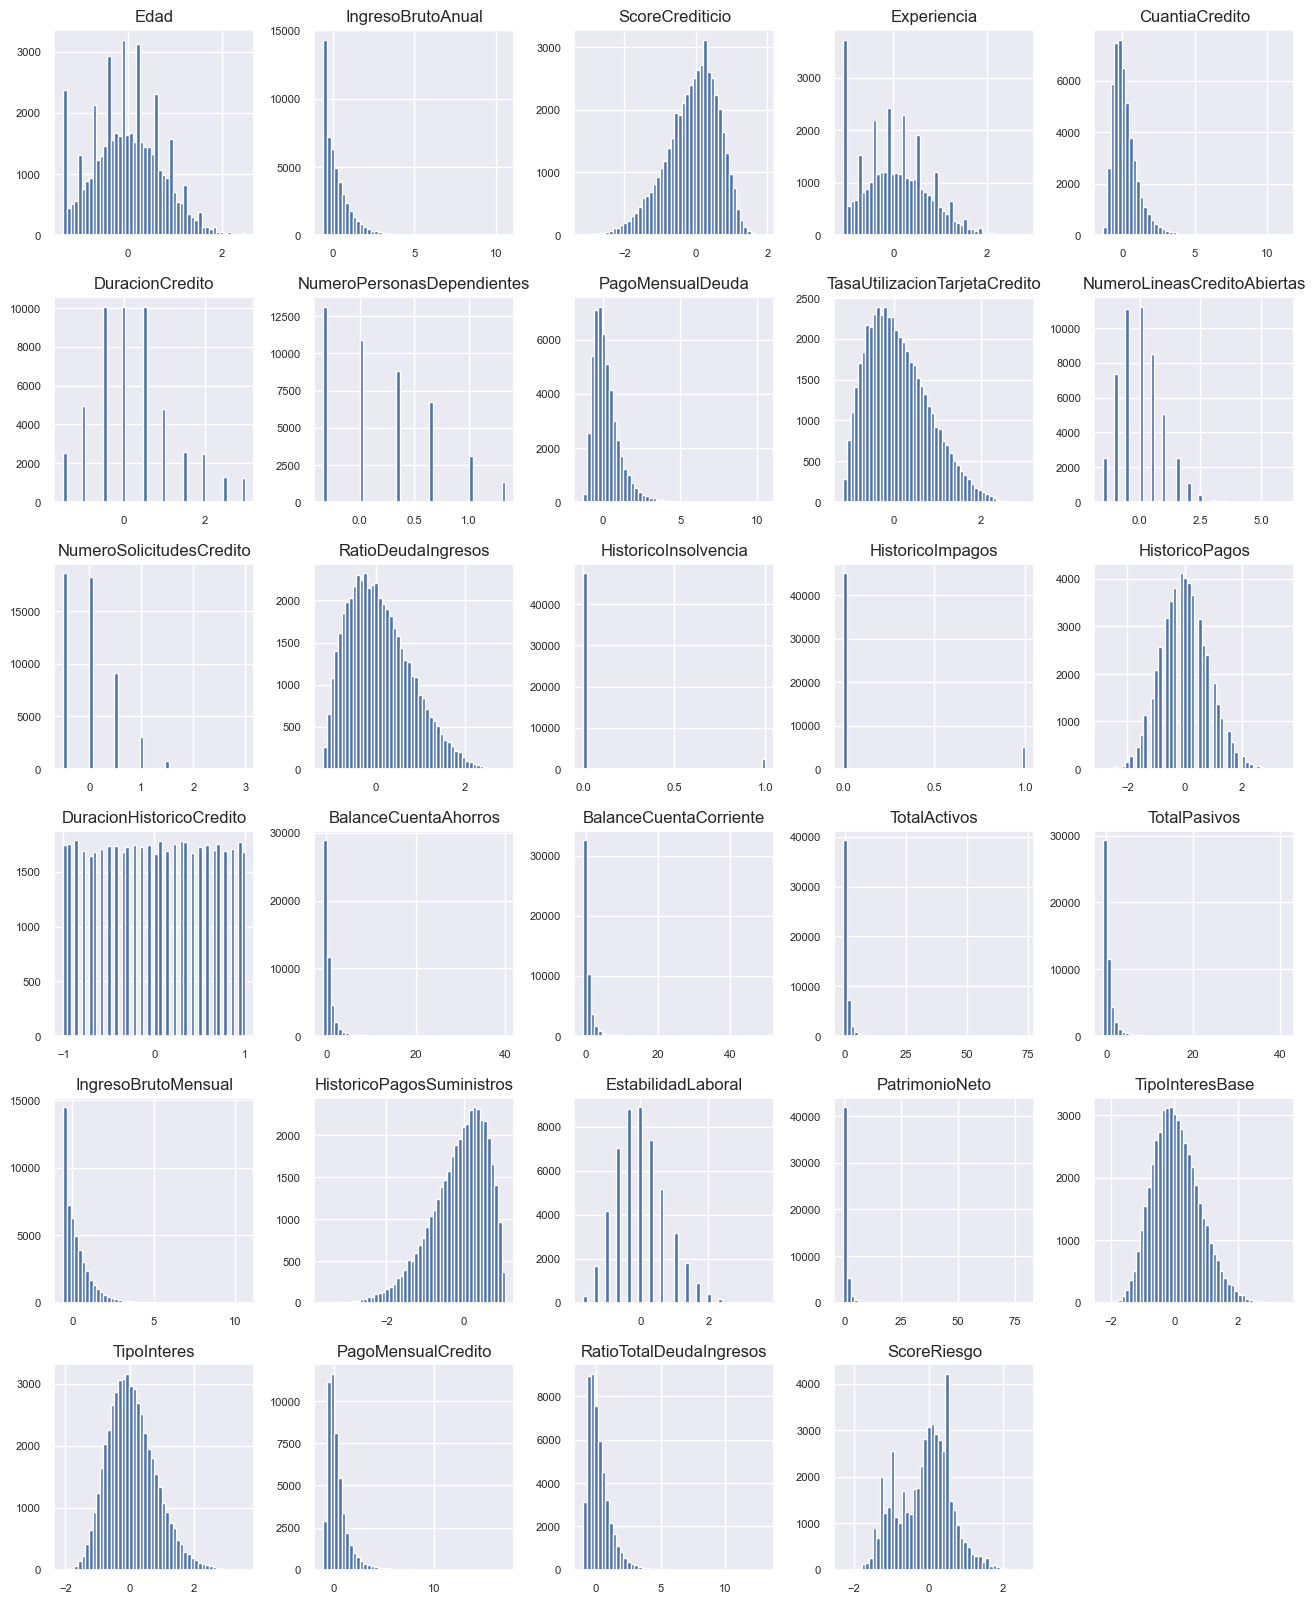

In [40]:
df_num_scaled.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Aunque visualmente observamos que los outliers siguen estando ahí, su influencia en el modelo se reduce en comparación con un escalado basado en la media, lo que suele mejorar el rendimiento en algoritmos que son sensibles a los valores extremos.

OTRA COSA DE OUTLIERS DISTINTA:

Ahora buscaremos detectar los outliers. En nuestro caso los eliminaremos. Falta un estudio más en profundidad. De momento he encontrado algo llamado IQR, pero también he visto que skrlearn tiene algo para detectar outliers.

In [21]:
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcular los cuantiles para las columnas numéricas
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir las condiciones para eliminar los outliers en las columnas numéricas
condicion_sin_outliers = ~((df_numerico < (Q1 - 10 * IQR)) | (df_numerico > (Q3 + 10 * IQR))).any(axis=1)

# Aplicar la condición para filtrar el DataFrame original
df_filtrado = df[condicion_sin_outliers]

# Mostrar las dimensiones del nuevo DataFrame
print(df_filtrado.shape)

(42247, 34)


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape